# LINEAR REGRESSION -  MINIPROYECTO

## FORMA 1 - GRADIENT DESCENT

El **descenso de gradiente** es un algoritmo de optimización que se utiliza para ajustar los parámetros de un modelo de regresión lineal. El objetivo es encontrar los valores de los parámetros que minimizan la función de costo, que mide la diferencia entre las predicciones del modelo y los valores reales.

El descenso de gradiente funciona iterativamente, actualizando los valores de los parámetros en cada iteración para reducir la función de costo. En cada iteración, se calcula el gradiente de la función de costo con respecto a los parámetros y se actualizan los parámetros en la dirección opuesta al gradiente. La tasa de aprendizaje controla el tamaño de los pasos que se dan en cada iteración.

Para aplicar el descenso de gradiente a un modelo de regresión lineal, se utiliza el **MSE** como función de costo. El MSE mide la diferencia entre las predicciones del modelo y los valores reales al cuadrado. El objetivo es minimizar el MSE ajustando los valores de los parámetros.


Paso a paso del algoritmo de descenso de gradiente para optimizar un modelo de regresión lineal:

1. Inicializa los parámetros del modelo con valores aleatorios.
2. Calcula la función de costo utilizando los valores actuales de los parámetros.
3. Calcula el gradiente de la función de costo con respecto a los parámetros.
4. Actualiza los parámetros en la dirección opuesta al gradiente multiplicado por la tasa de aprendizaje.
5. Repite los pasos 2-4 hasta que la función de costo converja a un mínimo o decidas parar.

COMO LO TENEIS QUE HACER VOSOTROS:

1. Inicializa los parametros `m` y `c` a cero o con valores aleatorios.
2. Elegimos un numero de iteraciones (eg. 100) y un ``learning_rate`` (eg. 0.01)
3. Inicializamos valores para X e Y. X que sean numpy arrays de 10 o 20 numeros (eg. range(10)) y la Y pueden ser parecida a la X pero con numeros arriba o abajo para simular aletoriedad (eg. 2,2,4,2,5,7,6,9,8,10)
4. Arrancamos el bucle for.
5. Calculamos la derivada del error respecto de `m` y `c`:
    - `dm = 2/n*sum((y-(m*x+c))*(-x))`
    - `dc = 2/n*sum((y-(m*x+c))*(-1))`
6. Actualizamos los parametros: `m=m-dm*lr` y `c=c-dc*lr`
7. Cada iteracion haceis un plot de la linea `x` y `m*x+c` respecto a los puntos originales (plot de x e y) y os guardais el las imagenes (Si haceis 100 iteraciones, tendreis 100 imagenes. Podeis valorar solo guardar por ejemplo cada 5 iteraciones por no hacer tantos plots).
8. Una vez terminamos printeamos m y c y con los plots generados teneis quer buscar alguna libreria en python y montar un gif con las imagenes de los plots:

![gif](https://th.bing.com/th/id/R.79e22f97090c346d704a68f7151e8cda?rik=oJV36GZyA1otdA&riu=http%3a%2f%2fcdn-images-1.medium.com%2fmax%2f640%2f1*eeIvlwkMNG1wSmj3FR6M2g.gif&ehk=0NUalJOl26VxY8ndNrkpV7GwYM1NVtJ5kMxU6jm5jB0%3d&risl=&pid=ImgRaw&r=0)

NOTA**: Todos los valores son orientativos. Podeis modificar los datos como querais. De hecho, os animo a que probeis y trasteeis.

In [4]:
#1. Inicializa los parámetros del modelo con valores aleatorios.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

#Datos de entrenamiento
X_train = np.array([0, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.array([1, 2, 4, 7, 8, 9, 2, 3, 5, 6])

m = 0 
b = 0 

#Tasa de aprendizaje
learning_rate = 0.01

#Numero de iteraciones
num_iterations = 1000

#Almacenamiento de los valores óptimos de m y b inicializamos variable vacia.
optimal_m = None
optimal_b = None

#Algoritmo de descenso de gradiente
for i in range(num_iterations):
    #Calcular las predicciones del modelo
    y_pred = m * X_train + b
    
    #Calcular el error cuadrático medio (MSE)
    mse = np.mean((y_pred - y_train) ** 2)
    
    #Guardar los valores óptimos de m y b si el MSE es mínimo
    if i == 0 or mse < min_mse:
        min_mse = mse
        optimal_m = m
        optimal_b = b
    
    #Guardar las imágenes cada 20 iteraciones
    if (i + 1) % 20 == 0:
        plt.scatter(X_train, y_train)
        plt.plot(X_train, y_pred, color='red', alpha=0.5)
        plt.title(f"Iteración {i+1}, MSE: {mse:.2f}") # 2f es para limitar los decimales
        plt.savefig(f'iter_{i+1:02d}_regression.png')  #Asegura que la numeración tenga dos dígitos
        plt.close()  #Cierra la figura para liberar memoria
    
    #Calcular el gradiente de la función de costo (MSE)
    grad_m = np.mean(2 * (y_pred - y_train) * X_train)
    grad_b = np.mean(2 * (y_pred - y_train))
    
    #Actualizar los parámetros m y b para mejorar la predicción
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

#Imprimir los valores óptimos de m y b
print("Valores óptimos:")
print("m:", optimal_m)
print("b:", optimal_b)

#Crear el GIF
images = []
for i in range(20, num_iterations + 1, 20):  # Guardar imágenes cada 10 iteraciones
    filename = f'iter_{i:02d}_regression.png'
    images.append(imageio.imread(filename))
imageio.mimsave('regression_animation.gif', images, fps=2)

#Limpiar las imágenes guardadas
for i in range(20, num_iterations + 1, 20):  # Eliminar imágenes cada 10 iteraciones
    os.remove(f'iter_{i:02d}_regression.png')

print("Se ha creado el GIF 'regression_animation.gif'")




Valores óptimos:
m: 0.2981482532848643
b: 3.083703321829817


/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_2063/2675197174.py:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Se ha creado el GIF 'regression_animation.gif'


# FORMA 2 - ECUACION NORMAL

El modelo de Linear Regression es unico en todo el universo ML. Es el unico que se puede resolver de forma analitica resolviendo una ecuacion sin necesidad de optimizar usando por ejemplo el descenso de gradiente. Para resolverlo se usa una ecuacion que se llama ECUACION NORMAL.

La ecuación normal es una forma de resolver la regresión lineal sin utilizar el descenso de gradiente. En lugar de iterar para encontrar los valores de los parámetros que minimizan la función de costo, la ecuación normal calcula los valores de los parámetros directamente.
La ecuación normal para la regresión lineal simple es:

$$\theta=(X^{T}X)^{−1}X^{T}y$$
Donde θ es el vector de parámetros, X es la matriz de características, y es el vector de valores objetivo y −1 denota la inversa de una matriz.
La ecuación normal se deriva al igualar el gradiente de la función de costo a cero. La solución resultante es la que minimiza la función de costo.

AQUI TENEIS LA FORMULA RESUELTA: https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-ecuacion-normal

Buscadla y aplicarla con vuestros datos de `X` e ``y``, y os calcula directamente los parametros ``m`` y ``c``.

In [37]:
import seaborn as sns


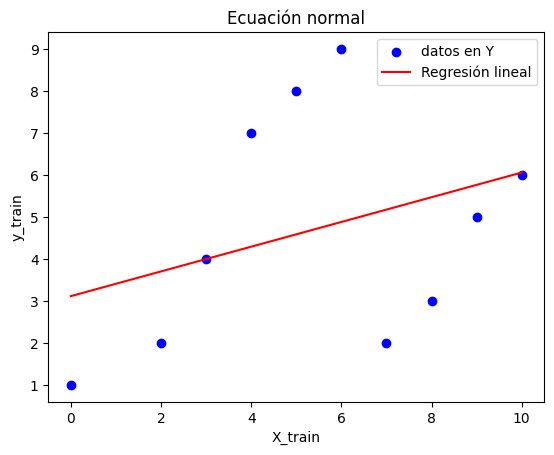

Parámetros óptimos:
m: 0.2943722943722942
b: 3.1103896103896105


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrenamiento
X_train = np.array([0, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Reshape para convertirlo en un array 2D
y_train = np.array([1, 2, 4, 7, 8, 9, 2, 3, 5, 6])

# Agregar una columna de unos a X_train para el término de intercepción
X_train_b = np.column_stack((np.ones_like(X_train), X_train))

# Calcular los parámetros utilizando la ecuación normal
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Obtener los parámetros m y b
b, m = theta_best[0], theta_best[1]  # nota que b es el primer elemento

# Predecir los valores de y con el modelo
y_pred = X_train_b.dot(theta_best)

# Visualizar los resultados
plt.scatter(X_train, y_train, color='blue', marker='o', label='datos en Y')
plt.plot(X_train, y_pred, color='red', label='Regresión lineal')
plt.title('Ecuación normal')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

# Mostrar los parámetros
print("Parámetros óptimos:")
print("m:", m)
print("b:", b)



# FORMA 3 - SKLEARN

Todos sabeis que si entrenamos un modelo de linear regression con sklearn podemos obtener los coeficientes con el metodo `.coef_` y el intercepto con `.intercept`.

Haz un fit del modelo con tus datos X e y, y comprueba que valores de coeficiente (m) y que valor de intercepto (c) te da



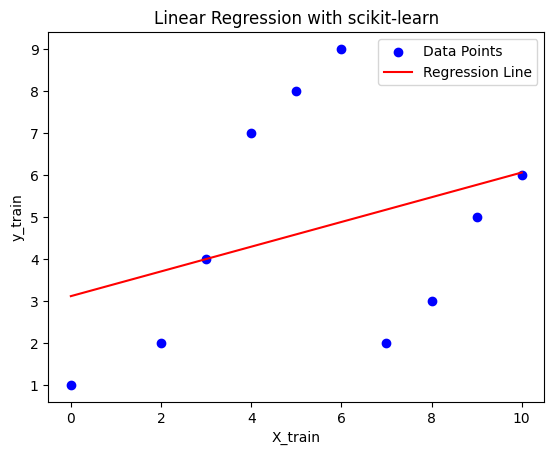

Parámetros óptimos:
m: 0.2943722943722944
b: 3.1103896103896105


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de entrenamiento
X_train = np.array([0, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_train = np.array([1, 2, 4, 7, 8, 9, 2, 3, 5, 6])

# Instanciar un objeto de regresión lineal
lm = LinearRegression()

# Ajustar el modelo a los datos
lm.fit(X_train, y_train)

# Obtener los coeficientes (pendiente e intercepción)
sklearn_m  = lm.coef_[0]
sklearn_b = lm.intercept_

# Predecir los valores de y con el modelo
y_pred = lm.predict(X_train)

# Graficar los datos y la línea de regresión
plt.scatter(X_train, y_train, color='blue', marker='o', label='Data Points')
plt.plot(X_train, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression with scikit-learn')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

# Mostrar los parámetros
print("Parámetros óptimos:")
print("m:", sklearn_m)
print("b:", sklearn_b)



In [9]:
print("<center>")
print("| **Variable** | **Gradient descent** | **Ecuación normal** | **sklearn** |")
print("|--------------|----------------------|---------------------|-------------|")
print(f"| m | {optimal_m} | {m} | {sklearn_m} |")
print(f"| c | {optimal_b} | {b} | {sklearn_b} |")
print("</center>")


<center>
| **Variable** | **Gradient descent** | **Ecuación normal** | **sklearn** |
|--------------|----------------------|---------------------|-------------|
| m | 0.30410462783973696 | 0.30406788936491524 | 0.2943722943722944 |
| c | 3.041607119561196 | 3.0418667658028635 | 3.1103896103896105 |
</center>


# CIERRE

Si lo habeis hecho bien, los tres metodos os han debido dar valores para m y c que deberian ser identicos o suuuper parecidos. Haz un print de los parametros en una tabla para compararlos y verificar que son iguales, como se muestra a continuación.

<center>

| **Variable** | **Gradient descendt** | **Ecuacion normal** | **sklearn** |
|-------------|-------------------|----------------------|---------------------|
|m    |  0.3454772825034164  |  0.34527687296416937  |  0.34527687  |
|c |  3.321256418022657  |  3.322475570032573  |  3.322475570032573  |


y=m * x + c

</center>